In [39]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [42]:
dataset = pd.read_csv('iris.csv')
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
dataset.to_csv('iris.csv', index=False)

In [6]:
#Process feature names
dataset.columns =[colname.strip(' (cm)').replace(" ", "_") for colname in dataset.columns.tolist()]
feature_names = dataset.columns.tolist()[:4]
feature_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [7]:
#Feature Engineering
dataset['sepal_length_to_sepal_width'] = dataset['sepal_length']/dataset['sepal_width']
dataset['petal_length_to_petal_width'] = dataset['petal_length']/dataset['petal_width']
dataset = dataset[[
     'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
    'sepal_length_to_sepal_width', 'petal_length_to_petal_width',
    'target']]

In [14]:
#Train test split
test_size=0.2
train_dataset, test_dataset = train_test_split(dataset, test_size=test_size, random_state=42)
train_dataset.shape, test_dataset.shape

y_train = train_dataset.loc[:, 'target'].values.astype('int32')
X_train = train_dataset.drop( 'target', axis=1).values.astype('float32')
                            
logreg = LogisticRegression(C=0.001, solver= 'lbfgs', multi_class='multinomial',max_iter=100)
logreg.fit(X_train, y_train)


LogisticRegression(C=0.001, multi_class='multinomial')

In [32]:
def plot_confusion_matrix(cm, target_names, title="Confusion_matrix", cmap=None, normalize=True):
    
    
    accuracy = np.trace(cm)/float(np.sum(cm))
    misclass = 1 - accuracy
    #if cmap is None:
    cmap = plt.get_cmap('Blues')
        
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm =cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]), 
                     horizontalalignment="center",
                      color = "white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted Label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [26]:
y_test = test_dataset.loc[:, 'target'].values.astype('int32')
x_test = test_dataset.drop('target', axis=1).values.astype('float32')
prediction = logreg.predict(x_test)
cm = confusion_matrix(prediction, y_test)
f1 = f1_score(y_true = y_test, y_pred = prediction, average = 'macro')

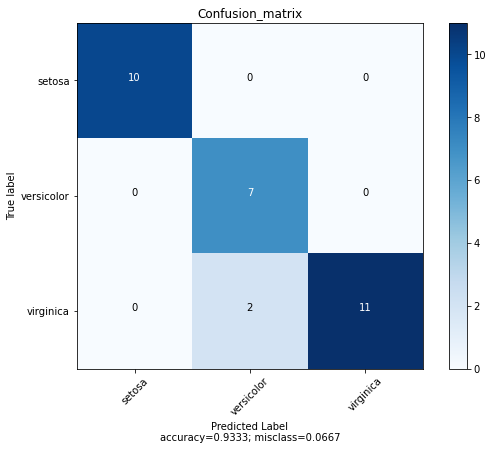

In [33]:
plot_confusion_matrix(cm, data.target_names, normalize=False)